In [1]:
import numpy as np
import matplotlib.pyplot as plt

def DifferentialEquation(y0, t0, tf, h, f, usrinput = None):

    if usrinput is None:
        print("\n 1. Método de Euler. \n 2. RungeKutta2. \n 3. RungeKutta3. \n 4. RungeKutta4. \n")
        usrinput = int(input("Elija qué método desea usar: "))
    
    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n+1)
    y_values[0] = y0

    if usrinput == 1:
        for i in range(n):
            y_values[i+1] = y_values[i] + (h * f(rng[i], y_values[i]))

    elif usrinput == 2:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            y_values[i+1] = y_values[i] + k2
            
    elif usrinput == 3:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            k3 = h * f(rng[i] + h, y_values[i] -k1 + (2 * k2))
            y_values[i+1] = y_values[i] + (1/6) * (k1 + (4 * k2) + k3)
            
    elif usrinput == 4:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            k3 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k2))
            k4 = h * f(rng[i] + h, y_values[i] + k3)
            y_values[i+1] = y_values[i] + (1/6) * (k1 + (2 * k2) + (2 * k3) + k4)
    else:
        print("ELija correctamente.")
        return 0
        
    return rng, y_values, usrinput


def MultistepMethod(y0, t0, tf, h, f, usrinput = None):
    if usrinput is None:
        print("\n 1. Euler. \n 2. AB2. \n 3. AB3. \n")
        usrinput = int(input("Elija qué método desea usar: "))
        
    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_pred = 0
    y_values = np.zeros(n+1)
    y_values[0] = y0

    m = usrinput

    for i in range(m):
        y_values[i+1] = y_values[i] + h*f(rng[i], y_values[i])
        
    if usrinput == 1:
        for j in range(n):
            y_pred = y_values[j] + (h * f(rng[j], y_values[j]))
            y_values[j+1] = y_values[j] + (h * f(rng[j+1], y_pred))
        
    elif usrinput == 2:
        for j in range(m, n):
            y_pred = y_values[j] + h * (3*f(rng[j], y_values[j]) - f(rng[j-1], y_values[j-1]))
            y_values[j+1] = y_values[j] + (h/12) * (5*f(rng[j+1], y_pred) + 8*f(rng[j], y_values[j] - f(rng[j-1], y_values[j-1])))
   
    elif usrinput == 3:
        for j in range(m, n):
            y_pred = y_values[j] + (h/12) * (23*f(rng[j], y_values[j]) - 16*f(rng[j-1], y_values[j-1]) + 5*f(rng[j-2], y_values[j-2]))
            y_values[j+1] = y_values[j] + (h/24) * (9*f(rng[j+1], y_pred) + 19*f(rng[j], y_values[j]) - 5*f(rng[j-1], y_values[j-1]) + f(rng[j-2], y_values[j-2]))
    
    else:
        print("ELija correctamente.")
        return None
    return rng, y_values, usrinput

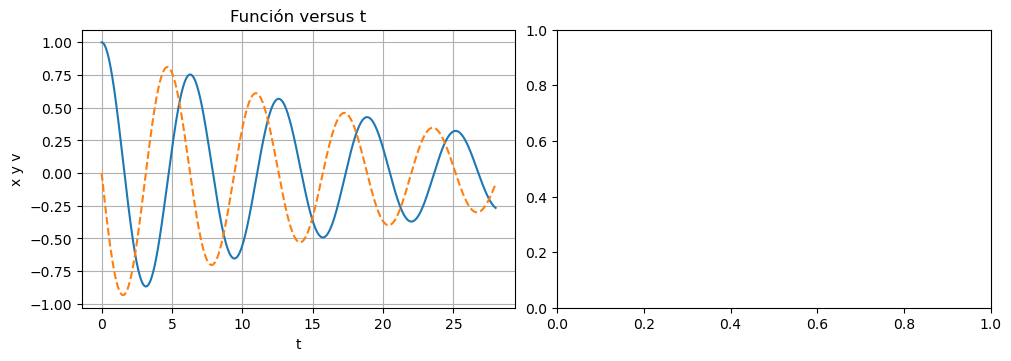

In [15]:
dx = lambda t, x, v: v
dv = lambda t, x, v: -(k/m) * x - (b/m) * v

t0 = 0
tf = 28
x0 = 1
v0 = 0
h = 1e-2

k = 1
m = 1
b = 0.1

n = int((tf-t0)/h)

t_v = np.linspace(t0, tf, n+1)
x_v = np.zeros(n+1)
v_v = np.zeros(n+1)
x_v[0] = x0
v_v[0] = v0

for i in range(n):
    x_v[i+1] = x_v[i] + (h * dx(t_v[i], x_v[i], v_v[i]))
    v_v[i+1] = v_v[i] + (h * dv(t_v[i], x_v[i], v_v[i]))
    

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, x_v,)
ax[0].plot(t_v, v_v, ls = "--")
ax[0].set_title("Función versus t")
ax[0].set_xlabel("t")
ax[0].set_ylabel("x y v")
ax[0].grid()

plt.show()

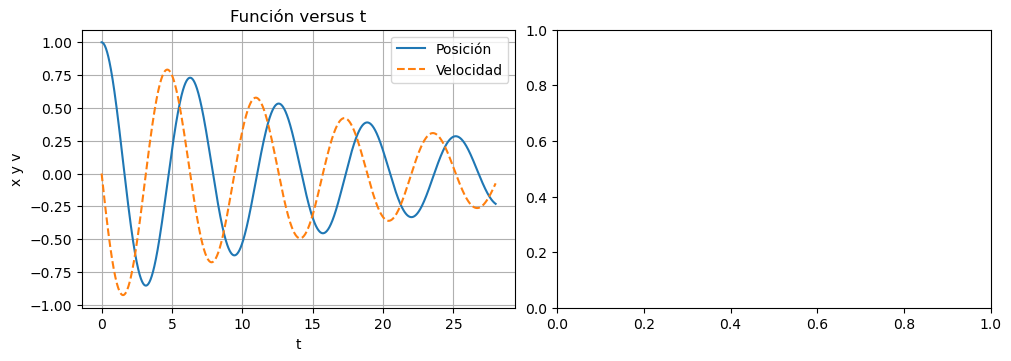

In [10]:
for i in range(n):
    k1 = h*dx(t_v[i], x_v[i], v_v[i])
    l1 = h*dv(t_v[i], x_v[i], v_v[i])
    k2 = h*dx(t_v[i] + (h/2), x_v[i] + (k1/2), v_v[i] + (l1/2))
    l2 = h*dv(t_v[i] + (h/2), x_v[i] + (k1/2), v_v[i] + (l1/2))

    x_v[i+1] = x_v[i] + k2
    v_v[i+1] = v_v[i] + l2
    

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t_v, x_v)
ax[0].plot(t_v, v_v, ls = "--")
ax[0].set_title("Función versus t")
ax[0].set_xlabel("t")
ax[0].set_ylabel("x y v")
ax[0].legend(["Posición", "Velocidad"])
ax[0].grid()

plt.show()